# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import random

In [2]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 


## Inputs & Data

Explanation of each input and where it comes from.

In [5]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [6]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [7]:
def get_region_network(row, columns, low_index=0, high_index=1):
    directed_graph = nx.DiGraph()
    for col in columns:
        region_1 = col.split("_")[0]
        region_2 = col.split("_")[1]
        directed_graph.add_edge(region_1, region_2, weight=np.mean(row[col][low_index:high_index]))
    return directed_graph

# Part 1. Making predictions of winning vs losing based on power

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [8]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [9]:
ALL_BANDS = ["theta", "beta", "gamma"]
# BAND_TO_FREQ = {"theta": {"low_freq": 4, "high_freq": 12}, "beta": {"low_freq": 13, "high_freq": 30}, "gamma": {"low_freq": 30, "high_freq": 70}}
# BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6, 11), "gamma": (30, 51)}

In [10]:
# MERGED_LFP_AND_SLEAP = pd.read_pickle("./proc/MERGED_LFP_AND_SLEAP.pkl")
MERGED_LFP_AND_SLEAP = pd.read_pickle("./proc/rce_lfp_power_and_velocity_region_col_baselinetrial_row.pkl")

- Filtering for powers that are from low velocity parts of the trial

In [11]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["velocity_bin"] == 0]

In [12]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.dropna(subset="mPFC_trial_velocity_parsed_window_averaged_power")

In [13]:
MERGED_LFP_AND_SLEAP.head()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,BLA_baseline_velocity_parsed_window_averaged_power,LH_baseline_velocity_parsed_window_averaged_power,MD_baseline_velocity_parsed_window_averaged_power,mPFC_trial_velocity_parsed_window_averaged_power,vHPC_trial_velocity_parsed_window_averaged_power,BLA_trial_velocity_parsed_window_averaged_power,LH_trial_velocity_parsed_window_averaged_power,MD_trial_velocity_parsed_window_averaged_power,velocity_bin,frequencies
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.010145535440317942, 0.011624272451715675, 0...","[0.01952660012000586, 0.017772082582421238, 0....","[0.01778550514353918, 0.01897019616318901, 0.0...","[0.01112484550257713, 0.015120199991768696, 0....","[0.00573943622687832, 0.012813267052382366, 0....","[0.015508890354088953, 0.012618618461083244, 0...","[0.027674524080577086, 0.02514619788253305, 0....","[0.014378295669285448, 0.015305386679455314, 0...",0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.00823701774957169, 0.009281212634719831, 0....","[0.012885928183822549, 0.012568993929378573, 0...","[0.013896368652451217, 0.012784355104092298, 0...","[0.005072513655663902, 0.0071730776351884, 0.0...","[0.017807810758419772, 0.02051735783988241, 0....","[0.0075150800916258895, 0.012030467854449603, ...","[0.003644272984766944, 0.005808118645131345, 0...","[0.006489759161394153, 0.007582477136466669, 0...",0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.006183388134788041, 0.009603665159479137, 0...","[0.006718227932426397, 0.010783870179057256, 0...","[0.00397248449841989, 0.005886471427959379, 0....","[0.01043389231412404, 0.011229291113011746, 0....","[0.018798404711232963, 0.024949532187259045, 0...","[0.009525639680784495, 0.010941343792716796, 0...","[0.016095087975310174, 0.015224296452442521, 0...","[0.011809376046566988, 0.010816138136563104, 0...",0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.00689989260430601, 0.009437438029868149, 0....","[0.010951516062517489, 0.010717930878165088, 0...","[0.008629680530200008, 0.008992947836672616, 0...","[0.006360855718027482, 0.007822405773560854, 0...","[0.0164348816792982, 0.024643952502461323, 0.0...","[0.00733101472807534, 0.00976732655872932, 0.0...","[0.00947190548027983, 0.009763030808051793, 0....","[0.008773587979931309, 0.01012670187919228, 0....",0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.008417580092331515, 0.011043369664016898, 0...","[0.011461996012372484, 0.01681702443398114, 0....","[0.011745971164537366, 0.017127554039316758, 0...","[0.00866204042766737, 0.008177641470017987, 0....","[0.01034111326211159, 0.021752070821626196, 0....","[0.00915661312184362, 0.010635218445454437, 0....","[0.01086375675

# Parsing for frequency bands

In [14]:
MERGED_LFP_AND_SLEAP.columns


Index(['time', 'recording_file', 'video_number', 'current_subject',
       'recording_dir', 'video_file', 'video_frame', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects', 'trial_outcome',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'file_path', 'start_frame', 'stop_frame',
       'mPFC_baseline_all_window_power', 'mPFC_trial_all_window_power',
       'vHPC_baseline_all_window_power', 'vHPC_trial_all_window_power',
       'BLA_baseline_all_window_power', 'BLA_trial_all_window_power',
       'LH_baseline_all_window_power', 'LH_trial_all_window_power',
       'MD_baseline_all_window_power', 'MD_trial_all_window_power',
       'mPFC_baseline_all_window_averaged_power',
       'vHPC_baseline_all_window_averaged_power',
       'BLA_baseline_all_window_averaged_power',
       'LH_baseline_all_window_averaged_power',
       'MD_baseline_all_window_averaged_power',
       'mPFC_trial_all_window_averaged_power',
     

In [15]:
velocity_parsed_window_averaged_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trial_velocity_parsed_window_averaged_power" in col]

- Parsing power based on frequency bands

In [16]:
for col in velocity_parsed_window_averaged_power_columns:
    region_base_name = "_".join(col.split("_")[:2])
    print(region_base_name)
    for band, (min_freq, max_freq) in BAND_TO_FREQ.items():
        print(band)
        MERGED_LFP_AND_SLEAP["{}_{}_all_power".format(region_base_name, band)] = MERGED_LFP_AND_SLEAP[col].apply(lambda x: x[min_freq:max_freq])
        MERGED_LFP_AND_SLEAP["{}_{}_mean_power".format(region_base_name, band)] = MERGED_LFP_AND_SLEAP["{}_{}_all_power".format(region_base_name, band)].apply(lambda x: x.mean())

mPFC_trial
theta
gamma
vHPC_trial
theta
gamma
BLA_trial
theta
gamma
LH_trial
theta
gamma
MD_trial
theta
gamma


In [17]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "mean_power" in col]

In [18]:
feature_columns

['mPFC_trial_theta_mean_power',
 'mPFC_trial_gamma_mean_power',
 'vHPC_trial_theta_mean_power',
 'vHPC_trial_gamma_mean_power',
 'BLA_trial_theta_mean_power',
 'BLA_trial_gamma_mean_power',
 'LH_trial_theta_mean_power',
 'LH_trial_gamma_mean_power',
 'MD_trial_theta_mean_power',
 'MD_trial_gamma_mean_power']

- Filtering out for trials that are win vs loss

In [39]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"].isin(["win", "lose", "rewarded"])]


In [40]:
network_df.groupby("trial_outcome").count()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,BLA_trial_gamma_all_power,BLA_trial_gamma_mean_power,LH_trial_theta_all_power,LH_trial_theta_mean_power,LH_trial_gamma_all_power,LH_trial_gamma_mean_power,MD_trial_theta_all_power,MD_trial_theta_mean_power,MD_trial_gamma_all_power,MD_trial_gamma_mean_power
trial_outcome,,,,,,,,,,,,,,,,,,,,,
lose,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
rewarded,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
win,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92


In [41]:
network_array = network_df[feature_columns].values

In [42]:
network_df.head()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,BLA_trial_gamma_all_power,BLA_trial_gamma_mean_power,LH_trial_theta_all_power,LH_trial_theta_mean_power,LH_trial_gamma_all_power,LH_trial_gamma_mean_power,MD_trial_theta_all_power,MD_trial_theta_mean_power,MD_trial_gamma_all_power,MD_trial_gamma_mean_power
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.0058572425135254855, 0.006024155421019179, ...",0.004916,"[0.031683409779156166, 0.035901720219428834, 0...",0.032140,"[0.0016897028177461373, 0.0016958708773867038,...",0.001219,"[0.033682761710991674, 0.04939171762101172, 0....",0.048547,"[0.00150702771435435, 0.0013828970830310156, 0...",0.001073
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.0028734564419150522, 0.002626836181665971, ...",0.002994,"[0.04559739021371773, 0.02580874058372985, 0.0...",0.021477,"[0.001913429314942553, 0.0020461830635455924, ...",0.001511,"[0.06317393258084905, 0.04281980489526815, 0.0...",0.030281,"[0.0011128775475115324, 0.0011790837765855223,...",0.000998
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.002494198219208697, 0.002866484029864364, 0...",0.002618,"[0.03659953485388654, 0.013115579469448331, 0....",0.017692,"[0.001480605803360029, 0.0015655109170097854, ...",0.001254,"[0.04226830702139646, 0.01873280535085233, 0.0...",0.019936,"[0.001131503018944822, 0.001213152223596419, 0...",0.000899
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.002101977154352306, 0.0024552829403974435, ...",0.002457,"[0.04464495113499005, 0.030182560195047767, 0....",0.027148,"[0.0014821101132228914, 0.0014516937107344901,...",0.001211,"[0.05282259663698554, 0.03794293105242014, 0.0...",0.028858,"[0.0011698032064997586, 0.001110345269394579, ...",0.000963
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.0025495252669991086, 0.002859794401033647, ...",0.002783,"[0.04495987866467409, 0.02917219033567512, 0.0...",0.022270,"[0.0017982008294426047, 0.0017415233964890372,...",0.001293,"[0.05398227580806995, 0.03896985154579797, 0.0...",0.027711,"[0.00129251660765889, 0.0013391750441791174, 0...",0.000886


In [79]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=True)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df["trial_outcome"].values[train_index]
    y_test = network_df["trial_outcome"].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))
mean_original_scores = np.mean(original_scores)
# 0.9393939393939394


In [80]:
original_scores

[0.6538461538461539,
 0.6730769230769231,
 0.6153846153846154,
 0.6346153846153846,
 0.6078431372549019]

In [81]:
y_test

array(['win', 'lose', 'lose', 'lose', 'win', 'win', 'win', 'win', 'win',
       'lose', 'win', 'lose', 'lose', 'win', 'lose', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'lose', 'lose',
       'win', 'lose', 'rewarded', 'rewarded', 'rewarded', 'win', 'win',
       'lose', 'win', 'rewarded', 'rewarded', 'lose', 'lose', 'lose',
       'lose', 'lose', 'rewarded', 'rewarded', 'rewarded', 'rewarded',
       'rewarded', 'lose', 'lose', 'lose', 'lose', 'rewarded', 'rewarded',
       'rewarded', 'rewarded'], dtype=object)

In [82]:
clf.predict(X_test)

array(['lose', 'win', 'win', 'lose', 'win', 'win', 'win', 'lose', 'win',
       'win', 'win', 'lose', 'lose', 'lose', 'rewarded', 'win', 'win',
       'win', 'win', 'win', 'lose', 'lose', 'lose', 'lose', 'rewarded',
       'rewarded', 'rewarded', 'win', 'win', 'win', 'win', 'rewarded',
       'win', 'lose', 'lose', 'lose', 'win', 'lose', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'rewarded', 'lose',
       'lose', 'lose', 'lose', 'lose', 'rewarded', 'lose'], dtype=object)

In [83]:
labels=["win", "lose", "rewarded"]

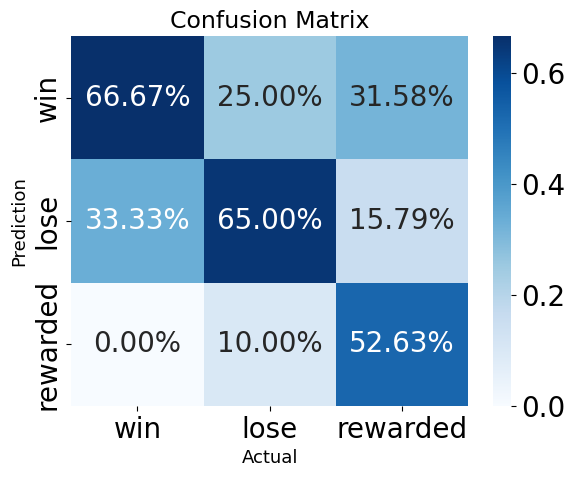

In [84]:
#compute the confusion matrix.
cm = confusion_matrix(clf.predict(X_test),y_test, labels=labels)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=labels, yticklabels=labels)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [85]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [86]:
std

array([0.05570975, 0.06873893, 0.0608915 , 0.06123397, 0.06307858,
       0.05041242, 0.0472934 , 0.04383302, 0.05441474, 0.07002318])

In [87]:
forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [88]:
forest_importances["index"]

0    mPFC_trial_gamma_mean_power
1    vHPC_trial_theta_mean_power
2      MD_trial_gamma_mean_power
3     BLA_trial_theta_mean_power
4    vHPC_trial_gamma_mean_power
5     BLA_trial_gamma_mean_power
6    mPFC_trial_theta_mean_power
7      MD_trial_theta_mean_power
8      LH_trial_theta_mean_power
9      LH_trial_gamma_mean_power
Name: index, dtype: object

In [89]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: x.split("_")[0])
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("_")[2])

In [90]:
forest_importances = forest_importances.iloc[:20]

In [93]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [94]:
BAND_TO_COLOR = {"theta": "green", "beta": "blue", "gamma": "red"}

In [95]:
MEASURE_TO_PATTERN = {"granger": "o", "coherence": ""}

In [96]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
# forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [97]:
forest_importances

,index,mdi,brain_regions,band,color
0,mPFC_trial_gamma_mean_power,0.118038,mPFC,gamma,red
1,vHPC_trial_theta_mean_power,0.113784,vHPC,theta,green
2,MD_trial_gamma_mean_power,0.113163,MD,gamma,red
3,BLA_trial_theta_mean_power,0.107571,BLA,theta,green
4,vHPC_trial_gamma_mean_power,0.107070,vHPC,gamma,red
5,BLA_trial_gamma_mean_power,0.099214,BLA,gamma,red
6,mPFC_trial_theta_mean_power,0.098345,mPFC,theta,green
7,MD_trial_theta_mean_power,0.084732,MD,theta,green
8,LH_trial_theta_mean_power,0.081941,LH,theta,green
9,LH_trial_gamma_mean_power,0.076143,LH,gamma,red


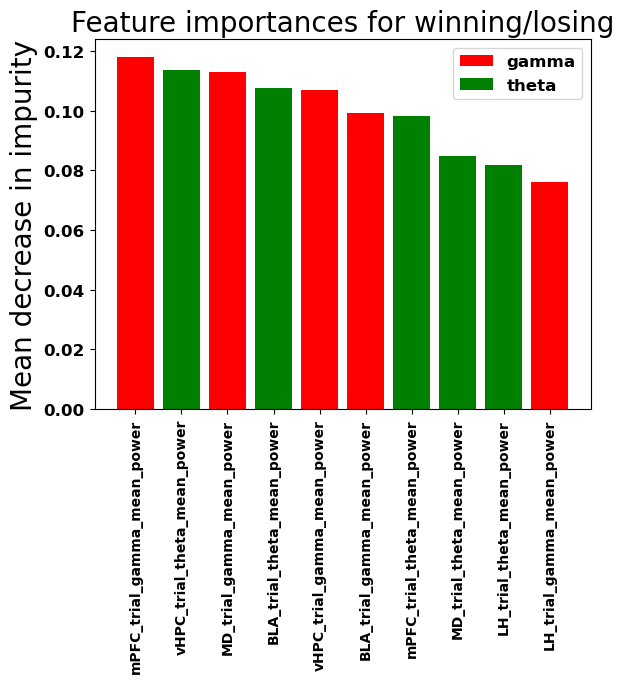

In [99]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mdi"], color=row["color"], label="{}".format(row["band"]))

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
# plt.savefig("./proc/network/rf_feature_importance.png")
plt.show()

- Shuffling the labels

In [51]:
shuffled_scores=[]
kFold=KFold(n_splits=5,shuffle=True)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df["trial_outcome"].values[train_index])
    y_test = network_df["trial_outcome"].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))
mean_shuffled_scores = np.mean(shuffled_scores)
# 0.9393939393939394


In [52]:
shuffled_scores

[0.28846153846153844,
 0.25,
 0.2692307692307692,
 0.3076923076923077,
 0.27450980392156865]

In [53]:
y_test

array(['win', 'win', 'win', 'win', 'win', 'win', 'win', 'win', 'lose',
       'lose', 'lose', 'lose', 'win', 'win', 'lose', 'rewarded',
       'rewarded', 'win', 'win', 'win', 'lose', 'rewarded', 'rewarded',
       'rewarded', 'win', 'win', 'win', 'win', 'win', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'rewarded', 'win',
       'lose', 'win', 'lose', 'lose', 'win', 'rewarded', 'rewarded',
       'rewarded', 'rewarded', 'win', 'lose', 'lose', 'lose', 'lose',
       'rewarded'], dtype=object)

In [54]:
clf.predict(X_test)

array(['lose', 'win', 'lose', 'rewarded', 'lose', 'win', 'win',
       'rewarded', 'lose', 'lose', 'win', 'win', 'lose', 'rewarded',
       'win', 'rewarded', 'lose', 'rewarded', 'rewarded', 'lose',
       'rewarded', 'lose', 'lose', 'rewarded', 'win', 'win', 'rewarded',
       'lose', 'rewarded', 'rewarded', 'rewarded', 'rewarded', 'win',
       'win', 'win', 'lose', 'rewarded', 'lose', 'rewarded', 'lose',
       'lose', 'win', 'lose', 'lose', 'lose', 'rewarded', 'rewarded',
       'lose', 'rewarded', 'rewarded', 'win'], dtype=object)

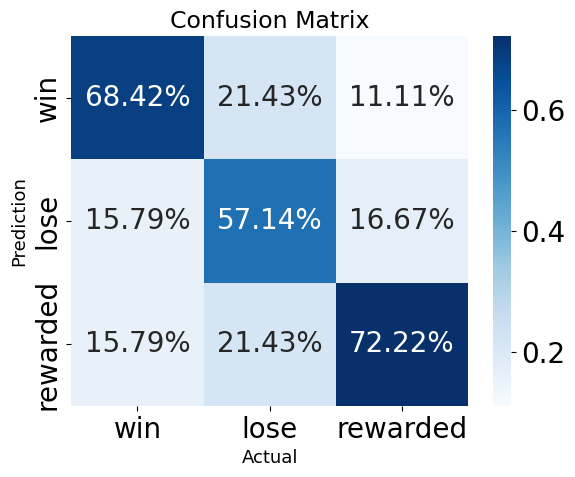

In [73]:
#compute the confusion matrix.
cm = confusion_matrix(clf.predict(X_test),y_test, labels=labels)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=labels, yticklabels=labels)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [74]:
shuffled_scores

[0.28846153846153844,
 0.25,
 0.2692307692307692,
 0.3076923076923077,
 0.27450980392156865]

In [75]:
original_scores

[0.5961538461538461,
 0.6538461538461539,
 0.6923076923076923,
 0.5576923076923077,
 0.6666666666666666]

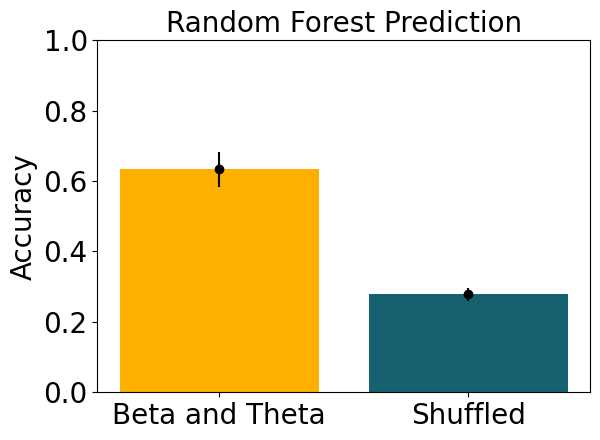

In [78]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Prediction", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[np.std(original_scores), np.std(shuffled_scores)], fmt="o", color="black")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("./proc/rf_power_predictions.png")

# With coherence and granger's causality

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "mean_power" in col]

In [ ]:
feature_columns

In [ ]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"].isin(["win", "lose"])]


In [ ]:
network_df.groupby("trial_outcome").count()

In [ ]:
network_array = network_df[feature_columns]

In [ ]:
scaler = StandardScaler()
scaler.fit(network_array)

In [ ]:
network_array = scaler.transform(network_array)

In [ ]:
non_nan_mask = ~np.isnan(network_array).any(axis=1)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
StratifiedKFold.s

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(network_array[non_nan_mask], network_df["trial_outcome"][non_nan_mask], test_size = 0.20, stratify=network_df["trial_outcome"]) 

In [ ]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=False)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index,test_index in kFold.split(network_array[non_nan_mask]):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = network_array[non_nan_mask][train_index], network_array[non_nan_mask][test_index], network_df["trial_outcome"][non_nan_mask].values[train_index], network_df["trial_outcome"][non_nan_mask].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))
mean_original_scores = np.mean(scores)
# 0.9393939393939394


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(clf.predict(X_test),y_test)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Lose','Win'],
            yticklabels=['Lose','Win'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Shuffle and re-evaluate
shuffled_scores = []
n_permutations = 5

for i in range(n_permutations):
    y_shuffled = shuffle(y_train, random_state=i)
    model = RandomForestClassifier(n_estimators = 100)
    model.fit(X_train, y_shuffled)
    score = accuracy_score(y_test, model.predict(X_test))
    shuffled_scores.append(score)
mean_shuffled_scores = np.mean(shuffled_scores)


In [ ]:
shuffled_scores=[]
kFold=KFold(n_splits=5,shuffle=False)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for i, (train_index,test_index) in enumerate(kFold.split(network_array[non_nan_mask])):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    y_train = shuffle(y_train, random_state=i)

    X_train, X_test, y_train, y_test = network_array[non_nan_mask][train_index], network_array[non_nan_mask][test_index], network_df["trial_outcome"][non_nan_mask].values[train_index], network_df["trial_outcome"][non_nan_mask].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))
mean_shuffled_scores = np.mean(scores)

In [ ]:
shuffled_scores

In [ ]:
original_scores

In [ ]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_score), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Prediction", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_score), np.mean(shuffled_scores)], yerr=[np.std(original_score), np.std(shuffled_scores)], fmt="o", color="black")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("./proc/rf_power_predictions.png")

# With Coherence

In [ ]:
MERGED_LFP_AND_SLEAP = pd.read_pickle("./proc/MERGED_LFP_AND_SLEAP.pkl")


In [ ]:
MERGED_LFP_AND_SLEAP.columns

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "averaged" in col and "coherence" in col or "averaged" in col and "granger" in col]

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "gamma" in col]
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "averaged" in col]

In [ ]:
raise ValueError()

In [ ]:
feature_columns

In [ ]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"].isin(["win", "lose"])]


In [ ]:
network_array = network_df[feature_columns]

In [ ]:
scaler = StandardScaler()
scaler.fit(network_array)

In [ ]:
network_array = scaler.transform(network_array)

In [ ]:
non_nan_mask = ~np.isnan(network_array).any(axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(network_array[non_nan_mask], network_df["trial_outcome"][non_nan_mask], test_size = 0.20) 

In [ ]:
scores=[]
kFold=KFold(n_splits=5,shuffle=False)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index,test_index in kFold.split(network_array[non_nan_mask]):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = network_array[non_nan_mask][train_index], network_array[non_nan_mask][test_index], network_df["trial_outcome"][non_nan_mask].values[train_index], network_df["trial_outcome"][non_nan_mask].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    scores.append(clf.score(X_test,y_test))
print(np.mean(scores))
# 0.9393939393939394


In [ ]:
scores

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [ ]:
std

In [ ]:
forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [ ]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: x.split("_")[:2])
forest_importances["measure"] = forest_importances["index"].apply(lambda x: x.split("_")[-1])
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("_")[-2])

In [ ]:
forest_importances = forest_importances.iloc[:20]

In [ ]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [ ]:
BAND_TO_COLOR = {"theta": "green", "beta": "blue", "gamma": "red"}

In [ ]:
MEASURE_TO_PATTERN = {"granger": "o", "coherence": ""}

In [ ]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [ ]:
forest_importances

In [ ]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
plt.savefig("./proc/network/rf_feature_importance.png")
plt.show()

# Example graph Classification with Graph Kernel 

In [ ]:
from grakel.datasets import fetch_dataset
MUTAG = fetch_dataset("MUTAG", verbose=False)
G = MUTAG.data
y = MUTAG.target

In [ ]:
from grakel import NeighborhoodSubgraphPairwiseDistance

In [ ]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram
wl_kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)
wl_kernel = NeighborhoodSubgraphPairwiseDistance(normalize=False)



In [ ]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

In [ ]:
G_train[0][0]

In [ ]:
G_train[0][1]

In [ ]:
G_train[0][2]

In [ ]:
for item in G_train:
    item[2] = {key: [key[0], key[0]] for key, value in item[2].items()}

In [ ]:
G_train[0][2]

In [ ]:
K_train = wl_kernel.fit_transform(G_train)


In [ ]:
K_test = wl_kernel.transform(G_test)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)
SVC(kernel='precomputed')

y_pred = clf.predict(K_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("%2.2f %%" %(round(accuracy_score(y_test, y_pred)*100)))

In [ ]:
import numpy as np
from grakel.kernels import MultiscaleLaplacian

adj = np.array([[0,0,1,1],[0,0,1,0],[1,1,0,1],[1,0,1,0]])
node_attributes = {0:[1], 1:[1], 2:[1], 3:[1]}
G1 = [adj, node_attributes]

adj = np.array([[0,0,.2,.2],[0,0,.2,0],[.2,.2,0,.2],[.2,0,.2,0]])
node_attributes = {0:[1], 1:[1], 2:[1], 3:[1]}
G2 = [adj, node_attributes]

Gs = [G1,G2]

ml_kernel = MultiscaleLaplacian(P=4, L=2, n_samples=4)
K = ml_kernel.fit_transform(Gs)
print(K)



In [ ]:
adj

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
K_train = wl_kernel.fit_transform([G, G])

# Graph Classification with Graph Kernel 

In [ ]:
# Create a directed graph to handle directional edges
G = nx.MultiDiGraph()



In [ ]:
feature_df = pd.DataFrame(feature_columns, columns=["index"])

In [ ]:
feature_df = pd.DataFrame(feature_columns, columns=["index"])
feature_df["brain_regions"] = feature_df["index"].apply(lambda x: x.split("_")[:2])
feature_df["measure"] = feature_df["index"].apply(lambda x: x.split("_")[-1])
feature_df["band"] = feature_df["index"].apply(lambda x: x.split("_")[-2])

In [ ]:
feature_df

In [ ]:
for region in ["BLA", "MD", "mPFC", "LH", "vHPC"]:
    G.add_node(region)

In [ ]:
brain_region_pairs = [('BLA', 'LH'),
 ('BLA', 'MD'),
 ('BLA', 'mPFC'),
 ('BLA', 'vHPC'),
 ('LH', 'MD'),
 ('LH', 'mPFC'),
 ('LH', 'vHPC'),
 ('MD', 'mPFC'),
 ('MD', 'vHPC'),
 ('mPFC', 'vHPC')]

In [ ]:
columns = feature_columns

In [ ]:
gl_edges = []

# for node in G.nodes(data=True):
#     gl_graph.append(node[0])

# for edge in G.edges(data=True):
#     if 'directional' in edge[2]:
#         # Directional edge: only add in one direction
#         gl_edges.append((edge[0], edge[1], edge[2]['granger']))
#     else:
#         # Coherence is bidirectional
#         gl_edges.append((edge[0], edge[1], edge[2]['coherence']))



region_pair_to_measure = {}
for region_1, region_2 in brain_region_pairs:
    # print(region_1)
    # print(region_2)
    # reg1_reg2_dict = {}
    # reg2_reg1_dict = {}
    region_pair_to_measure[(region_1, region_2)] = {}
    region_pair_to_measure[(region_2, region_1)] = {}

    current_df = feature_df[(feature_df["index"].str.contains(region_1)) & (feature_df["index"].str.contains(region_2))].sort_values(["measure", "band", "index"])

    for index, row in current_df.iterrows():
        current_column = row["index"]
    
        first_region = current_column.split("_")[0]
        second_region = current_column.split("_")[1]
        value = MERGED_LFP_AND_SLEAP[current_column].iloc[0]
        # print(first_region, second_region)
        # print(row["index"])
        # print(first_region, second_region)
        if "coherence" in current_column:
            region_pair_to_measure[(second_region, first_region)]["{}_{}".format(row["band"], row["measure"])] = value
            gl_edges.append((second_region, first_region, value))
            
        region_pair_to_measure[(first_region, second_region)]["{}_{}".format(row["band"], row["measure"])] = value
        gl_edges.append((first_region, second_region, value))


In [ ]:
# Add edges
for (src, dst), data in region_pair_to_measure.items():
    G.add_edge(src, dst, **data)

In [ ]:
# Convert to GraKeL compatible format
gl_graph = []
for node in G.nodes(data=True):
    gl_graph.append(node[0])

In [ ]:
gl_format_graph = Graph(gl_graph, gl_edges)


In [ ]:
import networkx as nx
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from grakel import Graph

# Sample data: replace with your actual data
brain_regions = ['RegionA', 'RegionB', 'RegionC', 'RegionD', 'RegionE']
connections = [
    ('RegionA', 'RegionB', {'coherence': 0.7, 'granger': 0.5}),
    ('RegionB', 'RegionC', {'coherence': 0.8, 'granger': 0.3}),
    # Assume directional edge for Granger causality from D to E
    ('RegionD', 'RegionE', {'coherence': 0.6, 'granger': 0.7, 'directional': True}),
    # ... Add other connections
]

# Create a directed graph to handle directional edges
G = nx.MultiDiGraph()

# Add nodes
for region in brain_regions:
    G.add_node(region)

# Add edges
for src, dst, data in connections:
    G.add_edge(src, dst, **data)
    if not data.get('directional', False):  # If not directional, add the reverse edge
        G.add_edge(dst, src, **data)

# Convert to GraKeL compatible format
gl_graph = []
for node in G.nodes(data=True):
    gl_graph.append(node[0])

gl_edges = []
for edge in G.edges(data=True):
    if 'directional' in edge[2]:
        # Directional edge: only add in one direction
        gl_edges.append((edge[0], edge[1], edge[2]['granger']))
    else:
        # Coherence is bidirectional
        gl_edges.append((edge[0], edge[1], edge[2]['coherence']))

gl_format_graph = Graph(gl_graph, gl_edges)

# Instantiate a Weisfeiler-Lehman kernel
wl_kernel = WeisfeilerLehman(n_iter=5, base_graph_kernel=VertexHistogram)

# Compute the kernel matrix
kernel_matrix = wl_kernel.fit_transform([gl_format_graph])

In [ ]:
gl_graph

In [ ]:
gl_edges

In [ ]:


gl_edges = []
for edge in G.edges(data=True):
    if 'directional' in edge[2]:
        # Directional edge: only add in one direction
        gl_edges.append((edge[0], edge[1], edge[2]['granger']))
    else:
        # Coherence is bidirectional
        gl_edges.append((edge[0], edge[1], edge[2]['coherence']))

gl_format_graph = Graph(gl_graph, gl_edges)

In [ ]:
for edge in G.edges(data=True):
    print(edge)

In [ ]:
gl_edges = []
for edge in G.edges(data=True):
    if 'directional' in edge[2]:
        # Directional edge: only add in one direction
        gl_edges.append((edge[0], edge[1], edge[2]['granger']))
    else:
        # Coherence is bidirectional
        gl_edges.append((edge[0], edge[1], edge[2]['coherence']))

gl_format_graph = Graph(gl_graph, gl_edges)

In [ ]:
G.get_edge_data("BLA", "")

In [ ]:
MERGED_LFP_AND_SLEAP["LH_BLA_averaged_beta_granger"]

In [ ]:
region_pair_to_measure

In [ ]:
# Add nodes
for region in brain_regions:
    G.add_node(region)

In [ ]:
# Add nodes
for region in brain_regions:
    G.add_node(region)



In [ ]:
# Add edges
for src, dst, data in connections:
    G.add_edge(src, dst, **data)
    if not data.get('directional', False):  # If not directional, add the reverse edge
        G.add_edge(dst, src, **data)

In [ ]:
def create_functional_graph(row, columns, brain_region_pairs=None, measures=None, bands=None):
    """
    """
    if brain_region_pairs is None:
        brain_region_pairs = [('BLA', 'LH'),
         ('BLA', 'MD'),
         ('BLA', 'mPFC'),
         ('BLA', 'vHPC'),
         ('LH', 'MD'),
         ('LH', 'mPFC'),
         ('LH', 'vHPC'),
         ('MD', 'mPFC'),
         ('MD', 'vHPC'),
         ('mPFC', 'vHPC')]

    if measures is None:
        measures = ["coherence", "granger"]

    if bands is None:
        bands = ["theta", "beta", "gamma"]

    G = nx.MultiDiGraph()
    for region in ["BLA", "MD", "mPFC", "LH", "vHPC"]:
        G.add_node(region)
    
    
    try:
        feature_df = pd.DataFrame(columns, columns=["index"])
        feature_df["brain_regions"] = feature_df["index"].apply(lambda x: x.split("_")[:2])
        feature_df["measure"] = feature_df["index"].apply(lambda x: x.split("_")[-1])
        feature_df["band"] = feature_df["index"].apply(lambda x: x.split("_")[-2])
        
        G = nx.MultiDiGraph()      
        all_columns = []
        
        for region_1, region_2 in brain_region_pairs:
            # print(region_1)
            # print(region_2)
            reg1_reg2_dict = {}
            reg2_reg1_dict = {}
            for current_col in [col for col in columns if region_1 in col and region_2 in col]:
                first_region = current_col.split("_")[0]
                second_region = current_col.split("_")[1]
                if "coherence" in col:
                    reg1_reg2_dict["{}_{}".format(band, measure)] = {}
        

            
            for measure in measures:
                for band in bands:
                    for col in feature_df[(feature_df["band"] == band) & (feature_df["measure"] == measure) & (feature_df["brain_regions"].apply(lambda x: region_1 in x)) & ((feature_df["brain_regions"].apply(lambda x: region_2 in x)))]["index"]:
                        # print(col)
                        reg_1 = col.split("_")[0]
                        reg_2 = col.split("_")[1]
                        if "coherence" in col:
                            # print(reg_2, reg_1)
                            edge_attributes[(reg_2, reg_1)].append(row[col])
                            G.add_edge(src, dst, **data)

    
                        # print(reg_1, reg_2)
                        edge_attributes[(reg_1, reg_2)].append(row[col])
                        all_columns.append(col)
        return all_columns, Graph(edges, edge_labels=edge_attributes)
    except Exception as e: 
        print(e)   
        return np.nan

In [ ]:
# Create a directed graph to handle directional edges
G = nx.MultiDiGraph()

# Add nodes
for region in brain_regions:
    G.add_node(region)

# Add edges
for src, dst, data in connections:
    G.add_edge(src, dst, **data)
    if not data.get('directional', False):  # If not directional, add the reverse edge
        G.add_edge(dst, src, **data)

# OLD CODE

In [ ]:
forest_importances.groupby(["measure", "band"])["mdi"].mean()

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
trial_trace_columns = sorted([col.split("_")[0] for col in MERGED_LFP_AND_SLEAP.columns if "trial_lfp_trace" in col])


In [ ]:
trial_brain_region_pairs = generate_pairs(trial_trace_columns)


In [ ]:
trial_brain_region_pairs

In [ ]:


from itertools import product

In [ ]:
feature_df["brain_regions"].str.contains(region_1)

In [ ]:
edge_attributes

In [ ]:
MERGED_LFP_AND_SLEAP["LH_BLA_averaged_theta_granger"]

In [ ]:
def create_functional_graph(row, columns, brain_region_pairs=None, measures=None, bands=None):
    """
    """
    if brain_region_pairs is None:
        brain_region_pairs = [('BLA', 'LH'),
         ('BLA', 'MD'),
         ('BLA', 'mPFC'),
         ('BLA', 'vHPC'),
         ('LH', 'MD'),
         ('LH', 'mPFC'),
         ('LH', 'vHPC'),
         ('MD', 'mPFC'),
         ('MD', 'vHPC'),
         ('mPFC', 'vHPC')]

    if measures is None:
        measures = ["coherence", "granger"]

    if bands is None:
        bands = ["theta", "beta", "gamma"]
    try:
        feature_df = pd.DataFrame(columns, columns=["index"])
        feature_df["brain_regions"] = feature_df["index"].apply(lambda x: x.split("_")[:2])
        feature_df["measure"] = feature_df["index"].apply(lambda x: x.split("_")[-1])
        feature_df["band"] = feature_df["index"].apply(lambda x: x.split("_")[-2])
        
        edges = {}
        edge_attributes = {}
        all_columns = []
        for region_1, region_2 in brain_region_pairs:
            # print(region_1)
            # print(region_2)
            edges[(region_1, region_2)] = 1
            edges[(region_2, region_1)] = 1
            edge_attributes[(region_1, region_2)] = []
            edge_attributes[(region_2, region_1)] = []
            for measure in measures:
                for band in bands:
                    for col in feature_df[(feature_df["band"] == band) & (feature_df["measure"] == measure) & (feature_df["brain_regions"].apply(lambda x: region_1 in x)) & ((feature_df["brain_regions"].apply(lambda x: region_2 in x)))]["index"]:
                        # print(col)
                        reg_1 = col.split("_")[0]
                        reg_2 = col.split("_")[1]
                        if "coherence" in col:
                            # print(reg_2, reg_1)
                            edge_attributes[(reg_2, reg_1)].append(row[col])      
                        # print(reg_1, reg_2)
                        edge_attributes[(reg_1, reg_2)].append(row[col])
                        all_columns.append(col)
        return all_columns, Graph(edges, edge_labels=edge_attributes)
    except Exception as e: 
        print(e)   
        return np.nan

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
G.edge_dictionary

In [ ]:
MERGED_LFP_AND_SLEAP["BLA_LH_averaged_theta_coherence"]

In [ ]:
MERGED_LFP_AND_SLEAP["functional_graph"] = MERGED_LFP_AND_SLEAP.apply(lambda x: create_functional_graph(x, feature_columns), axis=1)

In [ ]:
MERGED_LFP_AND_SLEAP["functional_graph"].iloc[0]

In [ ]:
MERGED_LFP_AND_SLEAP["all_columns"] = MERGED_LFP_AND_SLEAP["functional_graph"].apply(lambda x: x[0])
MERGED_LFP_AND_SLEAP["functional_graph"] = MERGED_LFP_AND_SLEAP["functional_graph"].apply(lambda x: x[1])

In [ ]:
MERGED_LFP_AND_SLEAP["functional_graph"].iloc[0].edge_dictionary

In [ ]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram
wl_kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)

In [ ]:
from grakel.kernels import neighborhood_subgraph_pairwise_distance

In [ ]:
kernel = neighborhood_subgraph_pairwise_distance

In [ ]:
kernel = kernel.NeighborhoodSubgraphPairwiseDistance(n_jobs=5, normalize=True)

In [ ]:
kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)

In [ ]:
from grakel.datasets import fetch_dataset
MUTAG = fetch_dataset("MUTAG", verbose=False)
G = MUTAG.data
y = MUTAG.target

In [ ]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(MERGED_LFP_AND_SLEAP["functional_graph"], MERGED_LFP_AND_SLEAP["trial_outcome"], test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

In [ ]:
example = G_train[0]

In [ ]:
example.node_labels

In [ ]:
import networkx as nx

G = nx.Graph()
# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add weighted edges
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 2, weight=0.5)

G.add_edge(2, 3, weight=1.5)
G.add_edge(1, 3, weight=1.0)

In [ ]:
graph = [(dict(G_train[0].nodes(data=True)), dict(G_train[0].edges(data=True)))]

In [ ]:
K_train = kernel.fit_transform(G_train)

In [ ]:
example.edge_dictionary

In [ ]:
neighborhood_subgraph_pairwise_distance

In [ ]:
example = G_train[0]

In [ ]:
G[0]

In [ ]:
edges = {}
edge_attributes = {}
all_columns = []
for region_1, region_2 in trial_brain_region_pairs:
    print(region_1)
    print(region_2)
    edges[(region_1, region_2)] = 1
    edges[(region_2, region_1)] = 1
    edge_attributes[(region_1, region_2)] = []
    edge_attributes[(region_2, region_1)] = []
    for measure in ["coherence", "granger"]:
        for band in BAND_TO_FREQ:
            for col in feature_df[(feature_df["band"] == band) & (feature_df["measure"] == measure) & (feature_df["brain_regions"].apply(lambda x: region_1 in x)) & ((feature_df["brain_regions"].apply(lambda x: region_2 in x)))]["index"]:
                print(col)
                reg_1 = col.split("_")[0]
                reg_2 = col.split("_")[1]
                if "coherence" in col:
                    print(reg_2, reg_1)
                    edge_attributes[(reg_2, reg_1)].append(MERGED_LFP_AND_SLEAP[col].iloc[0])      
                print(reg_1, reg_2)
                edge_attributes[(reg_1, reg_2)].append(MERGED_LFP_AND_SLEAP[col].iloc[0])
                all_columns.append(col)

In [ ]:
edge_attributes

In [ ]:
BAND_TO_FREQ

In [ ]:
feature_columns

In [ ]:
edges

In [ ]:
feature_columns

In [ ]:
pair_base_name

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
MERGED_LFP_AND_SLEAP

In [ ]:
forest_importances.sort_values(0, ascending=False).head(n=25)

In [ ]:
plt.bar(forest_importances.sort_values(0, ascending=False).head(n=25))

In [ ]:
forest_importances = pd.DataFrame(importances, index=feature_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, fontsize=5)
ax.set_title("Feature importances using MDI\nfor winning/losing with Gamma Granger Causality", fontsize=10)
ax.set_ylabel("Mean decrease in impurity", fontsize=10)
fig.tight_layout()
plt.savefig("./proc/network/rf_feature_importance.png")